<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass7/bdm/Ayam%20Rendang/Vaex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Project Team:

NURUL WAHIEDA BINTI MUHAMMAD FARID SELLEKUMAR (MCS231022)

THANEATHARRAN A/L SANTHARASEKARAN (MSC232006)

RANJEET A/L THIAGARAJAN (MCS231015)

LINGGESH A/L TAMILMANI (MCS232005)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Upload the kaggle Token
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nurulwahieda","key":"da981fbe530fd1f2690e4485d6db0f8c"}'}

# Dataset Import

In [3]:
! pip install kaggle --quiet
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                    title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                        DAIGT V2 Train Dataset                       29MB  2023-11-16 01:38:36           2608        230  1.0              
thedevastator/global-video-game-sales-and-ratings      Global Video Game Sales and Ratings          71KB  2023-12-20 06:46:32           1420         30  0.9411765        
muhammadbinimran/housing-price-prediction-data         Housing Price Prediction Data               763KB  2023-11-21 17:56:32          11665        198  1.0              
thedevastator/film-genre-statistics                    Film Genre Statistics                        36KB  2023-12-19 06:45:48            730     

In [4]:
!kaggle datasets download -d yuanyuwendymu/airline-delay-and-cancellation-data-2009-2018

100% 1.95G/1.95G [01:07<00:00, 30.4MB/s]
100% 1.95G/1.95G [01:07<00:00, 30.8MB/s]


In [5]:
!unzip -u "/content/airline-delay-and-cancellation-data-2009-2018.zip"

Archive:  /content/airline-delay-and-cancellation-data-2009-2018.zip
  inflating: 2009.csv                
  inflating: 2010.csv                
  inflating: 2011.csv                
  inflating: 2012.csv                
  inflating: 2013.csv                
  inflating: 2014.csv                
  inflating: 2015.csv                
  inflating: 2016.csv                
  inflating: 2017.csv                
  inflating: 2018.csv                


# Vaex Installation



In [6]:
%%capture
%%bash
python -m pip install -U pip
python -m pip install vaex-core
python -m pip install vaex-hdf5
python -m pip install -U ipython ipykernel

In [7]:
pip install vaex-viz

In [8]:
import vaex
import gc
import numpy as np
import pandas as pd
import warnings
import time
import gc
import os

# Function for Comparison

## Read file

In [23]:

%%time
df = vaex.open('/content/2018.csv')


CPU times: user 1.39 s, sys: 138 ms, total: 1.53 s
Wall time: 868 ms


In [24]:
%%time
df

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs


#,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0.0,,0.0,268.0,250.0,225.0,1605.0,--,--,--,--,--,--
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0.0,,0.0,99.0,83.0,65.0,414.0,--,--,--,--,--,--
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,0.0,,0.0,134.0,126.0,106.0,846.0,--,--,--,--,--,--
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,-2.0,0.0,,0.0,190.0,182.0,157.0,1120.0,--,--,--,--,--,--
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,14.0,0.0,,0.0,112.0,106.0,83.0,723.0,--,--,--,--,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"7,213,441",2018-12-31,AA,1815,DCA,CLT,1534,1530.0,-4.0,20.0,1550.0,1702.0,7.0,1714,1709.0,-5.0,0.0,,0.0,100.0,99.0,72.0,331.0,--,--,--,--,--,--
"7,213,442",2018-12-31,AA,1816,CLT,DFW,1751,1757.0,6.0,18.0,1815.0,1943.0,10.0,1952,1953.0,1.0,0.0,,0.0,181.0,176.0,148.0,936.0,--,--,--,--,--,--
"7,213,443",2018-12-31,AA,1817,CLT,MEM,2015,2010.0,-5.0,36.0,2046.0,2114.0,4.0,2107,2118.0,11.0,0.0,,0.0,112.0,128.0,88.0,511.0,--,--,--,--,--,--
"7,213,444",2018-12-31,AA,1818,CLT,RDU,1300,1323.0,23.0,11.0,1334.0,1400.0,4.0,1350,1404.0,14.0,0.0,,0.0,50.0,41.0,26.0,130.0,--,--,--,--,--,--


## Data Understanding

In [25]:
%%time

df.head(5)

CPU times: user 1.62 ms, sys: 0 ns, total: 1.62 ms
Wall time: 1.64 ms


#,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512,-5,15,1527,1712,10,1745,1722,-23,0,,0,268,250,225,1605,--,--,--,--,--,--
1,2018-01-01,UA,2427,LAS,SFO,1115,1107,-8,11,1118,1223,7,1254,1230,-24,0,,0,99,83,65,414,--,--,--,--,--,--
2,2018-01-01,UA,2426,SNA,DEN,1335,1330,-5,15,1345,1631,5,1649,1636,-13,0,,0,134,126,106,846,--,--,--,--,--,--
3,2018-01-01,UA,2425,RSW,ORD,1546,1552,6,19,1611,1748,6,1756,1754,-2,0,,0,190,182,157,1120,--,--,--,--,--,--
4,2018-01-01,UA,2424,ORD,ALB,630,650,20,13,703,926,10,922,936,14,0,,0,112,106,83,723,--,--,--,--,--,--


In [26]:
%%time

df.info()

column,type,unit,description,expression
FL_DATE,date32[day],,,
OP_CARRIER,str,,,
OP_CARRIER_FL_NUM,int64,,,
ORIGIN,str,,,
DEST,str,,,
CRS_DEP_TIME,int64,,,
DEP_TIME,float64,,,
DEP_DELAY,float64,,,
TAXI_OUT,float64,,,
WHEELS_OFF,float64,,,


CPU times: user 2.95 s, sys: 161 ms, total: 3.11 s
Wall time: 3.15 s


## Count

In [29]:
print(f"size: {len(df)} with {len(df.columns)} columns")

size: 7213446 with 28 columns


In [30]:
%%time
len(df)

CPU times: user 23 µs, sys: 0 ns, total: 23 µs
Wall time: 27.7 µs


7213446

In [35]:
%%time
count_ft = df['DEP_DELAY'].count()

CPU times: user 7.77 s, sys: 497 ms, total: 8.27 s
Wall time: 6.06 s


## Mean

In [36]:
%%time

#integer
df.DEP_DELAY.mean()

CPU times: user 7.49 s, sys: 392 ms, total: 7.88 s
Wall time: 4.33 s


array(9.96985843)

In [37]:
%%time

#float
df.DEP_TIME.mean()

CPU times: user 7.53 s, sys: 454 ms, total: 7.98 s
Wall time: 4.45 s


array(1333.8538055)

## Standard Deviation

In [38]:
%%time

#integer
df.DEP_DELAY.std()

CPU times: user 10.8 s, sys: 1.9 s, total: 12.7 s
Wall time: 12.2 s


44.82963760599384

## Sum columns

In [39]:
%%time

df['DEP_DELAY'] + df['AIR_TIME']

CPU times: user 318 µs, sys: 0 ns, total: 318 µs
Wall time: 325 µs


Expression = (DEP_DELAY + AIR_TIME)
Length: 7,213,446 dtype: float64 (expression)
---------------------------------------------
      0  220
      1   57
      2  101
      3  163
      4  103
    ...     
7213441   68
7213442  154
7213443   83
7213444   49
7213445   52

## Sum columns mean

In [40]:
%%time

(df['DEP_DELAY'] + df['AIR_TIME']).mean()

CPU times: user 9.66 s, sys: 753 ms, total: 10.4 s
Wall time: 6.81 s


array(121.42414457)

## Value Counts

In [41]:
%%time

df.DEP_DELAY.value_counts()

CPU times: user 7.67 s, sys: 466 ms, total: 8.13 s
Wall time: 4.58 s


missing    117234
-5.0       556639
-4.0       545046
-3.0       530919
-2.0       480276
            ...  
1558.0          1
1359.0          1
1407.0          1
1484.0          1
1351.0          1
Length: 1489, dtype: int64

## Group-by

In [42]:
%%time
df_group=df.groupby(by='ORIGIN').agg({'DEP_DELAY':['mean','std'],'CRS_DEP_TIME':['mean','std']})
df_group

CPU times: user 24 s, sys: 1.79 s, total: 25.8 s
Wall time: 17.4 s


#,ORIGIN,DEP_DELAY_mean,DEP_DELAY_std,CRS_DEP_TIME_mean,CRS_DEP_TIME_std
0,DEN,10.37517697228145,42.72882486856913,1377.4273885647212,491.61189963616437
1,TYS,10.530753017819505,58.66916773238348,1182.572233350025,455.6834133749077
2,JAC,11.186586826347305,62.60150109899324,1150.005468378507,326.8142575431529
3,SLC,6.206149260616168,38.47025210203814,1402.1307251401986,497.2528573416381
4,CLE,9.001668461847135,47.987930484872834,1236.511563501085,465.2140385670496
...,...,...,...,...,...
353,BGM,11.42024202420242,76.02863703675344,1154.0282608695652,460.37968411860794
354,BRD,7.84185303514377,71.12136213878924,1066.480376766091,421.82034128449175
355,ADK,3.8514851485148514,39.46182166450838,1752.2788461538462,40.08871333842132
356,AKN,1.6825396825396826,16.412176467707003,1744.0,0.0


In [43]:
%%time
df_temp=df.groupby(df.ORIGIN,agg=vaex.agg.mean(df.DEP_DELAY))
df_temp

CPU times: user 18.6 s, sys: 1.41 s, total: 20 s
Wall time: 13.6 s


#,ORIGIN,DEP_DELAY_mean
0,DEN,10.37517697228145
1,TYS,10.530753017819505
2,JAC,11.186586826347305
3,SLC,6.206149260616168
4,CLE,9.001668461847135
...,...,...
353,BGM,11.42024202420242
354,BRD,7.84185303514377
355,ADK,3.8514851485148514
356,AKN,1.6825396825396826


In [44]:
%%time
df.groupby(df.ORIGIN,agg='count')

CPU times: user 17.6 s, sys: 1.04 s, total: 18.7 s
Wall time: 12.8 s


#,ORIGIN,count
0,DEN,235989
1,TYS,15976
2,JAC,4206
3,SLC,113054
4,CLE,48385
...,...,...
353,BGM,920
354,BRD,637
355,ADK,104
356,AKN,63


## Join

In [45]:
%%time
df_joined=df.join(df_temp,on='ORIGIN')
df_joined

CPU times: user 9.08 s, sys: 519 ms, total: 9.6 s
Wall time: 6.24 s


#,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,DEP_DELAY_mean
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0.0,,0.0,268.0,250.0,225.0,1605.0,--,--,--,--,--,--,14.881203676465313
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0.0,,0.0,99.0,83.0,65.0,414.0,--,--,--,--,--,--,9.960894099120774
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,0.0,,0.0,134.0,126.0,106.0,846.0,--,--,--,--,--,--,6.740330690388706
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,-2.0,0.0,,0.0,190.0,182.0,157.0,1120.0,--,--,--,--,--,--,10.304774136958837
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,14.0,0.0,,0.0,112.0,106.0,83.0,723.0,--,--,--,--,--,--,12.354664639007101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"7,213,441",2018-12-31,AA,1815,DCA,CLT,1534,1530.0,-4.0,20.0,1550.0,1702.0,7.0,1714,1709.0,-5.0,0.0,,0.0,100.0,99.0,72.0,331.0,--,--,--,--,--,--,10.21892838558858
"7,213,442",2018-12-31,AA,1816,CLT,DFW,1751,1757.0,6.0,18.0,1815.0,1943.0,10.0,1952,1953.0,1.0,0.0,,0.0,181.0,176.0,148.0,936.0,--,--,--,--,--,--,10.745946041014458
"7,213,443",2018-12-31,AA,1817,CLT,MEM,2015,2010.0,-5.0,36.0,2046.0,2114.0,4.0,2107,2118.0,11.0,0.0,,0.0,112.0,128.0,88.0,511.0,--,--,--,--,--,--,10.745946041014458
"7,213,444",2018-12-31,AA,1818,CLT,RDU,1300,1323.0,23.0,11.0,1334.0,1400.0,4.0,1350,1404.0,14.0,0.0,,0.0,50.0,41.0,26.0,130.0,--,--,--,--,--,--,10.745946041014458


In [46]:
%%time
df_joined2=df.join(df_group,on='ORIGIN')
df_joined2

CPU times: user 9.19 s, sys: 556 ms, total: 9.75 s
Wall time: 7.81 s


#,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27,DEP_DELAY_mean,DEP_DELAY_std,CRS_DEP_TIME_mean,CRS_DEP_TIME_std
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,1712.0,10.0,1745,1722.0,-23.0,0.0,,0.0,268.0,250.0,225.0,1605.0,--,--,--,--,--,--,14.881203676465313,50.677365799155154,1357.8814109470027,493.60827597437867
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,1223.0,7.0,1254,1230.0,-24.0,0.0,,0.0,99.0,83.0,65.0,414.0,--,--,--,--,--,--,9.960894099120774,40.080744027848255,1338.076666687356,544.9068961139524
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,1631.0,5.0,1649,1636.0,-13.0,0.0,,0.0,134.0,126.0,106.0,846.0,--,--,--,--,--,--,6.740330690388706,39.01093180180849,1280.635966281611,438.3901194997106
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,1748.0,6.0,1756,1754.0,-2.0,0.0,,0.0,190.0,182.0,157.0,1120.0,--,--,--,--,--,--,10.304774136958837,50.003421928020785,1341.887731445705,444.48972696373727
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,926.0,10.0,922,936.0,14.0,0.0,,0.0,112.0,106.0,83.0,723.0,--,--,--,--,--,--,12.354664639007101,46.90548133499587,1382.376632737954,469.7166862470247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"7,213,441",2018-12-31,AA,1815,DCA,CLT,1534,1530.0,-4.0,20.0,1550.0,1702.0,7.0,1714,1709.0,-5.0,0.0,,0.0,100.0,99.0,72.0,331.0,--,--,--,--,--,--,10.21892838558858,44.584959043355965,1352.2866198299087,467.3635537727654
"7,213,442",2018-12-31,AA,1816,CLT,DFW,1751,1757.0,6.0,18.0,1815.0,1943.0,10.0,1952,1953.0,1.0,0.0,,0.0,181.0,176.0,148.0,936.0,--,--,--,--,--,--,10.745946041014458,38.785250446024776,1467.985564703815,474.0887213589214
"7,213,443",2018-12-31,AA,1817,CLT,MEM,2015,2010.0,-5.0,36.0,2046.0,2114.0,4.0,2107,2118.0,11.0,0.0,,0.0,112.0,128.0,88.0,511.0,--,--,--,--,--,--,10.745946041014458,38.785250446024776,1467.985564703815,474.0887213589214
"7,213,444",2018-12-31,AA,1818,CLT,RDU,1300,1323.0,23.0,11.0,1334.0,1400.0,4.0,1350,1404.0,14.0,0.0,,0.0,50.0,41.0,26.0,130.0,--,--,--,--,--,--,10.745946041014458,38.785250446024776,1467.985564703815,474.0887213589214


## EDA Visualization

Vaex has no built-in method intended for plotting a scatter or line plot for lots of data. Its performance boost comes when plotting aggregate statistics like heatmaps, histograms

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [48]:
df.info()

column,type,unit,description,expression
FL_DATE,date32[day],,,
OP_CARRIER,str,,,
OP_CARRIER_FL_NUM,int64,,,
ORIGIN,str,,,
DEST,str,,,
CRS_DEP_TIME,int64,,,
DEP_TIME,float64,,,
DEP_DELAY,float64,,,
TAXI_OUT,float64,,,
WHEELS_OFF,float64,,,


### Barplot

In [50]:
%%time

Country_count = df.ORIGIN.value_counts().rename_axis('Origin').reset_index(name='count')
Country_count

CPU times: user 9.49 s, sys: 635 ms, total: 10.1 s
Wall time: 7.44 s


,Origin,count
0,ATL,390046
1,ORD,332953
2,DFW,279298
3,DEN,235989
4,CLT,233317
...,...,...
353,AKN,63
354,CYS,58
355,IFP,45
356,ART,25


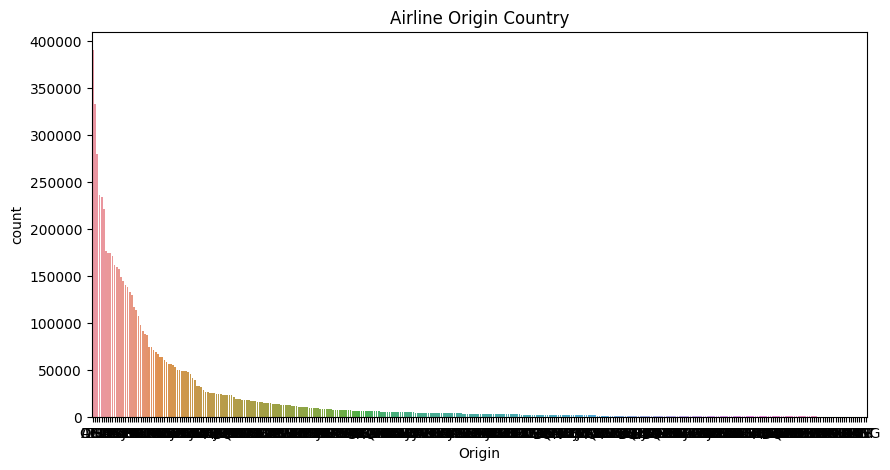

CPU times: user 3.79 s, sys: 198 ms, total: 3.99 s
Wall time: 4.02 s


In [51]:
# show barplot

%%time
plt.figure(figsize=(10,5))
sns.barplot(x='Origin', y='count',data=Country_count).set(title="Airline Origin Country")
plt.show()

### Boxplot

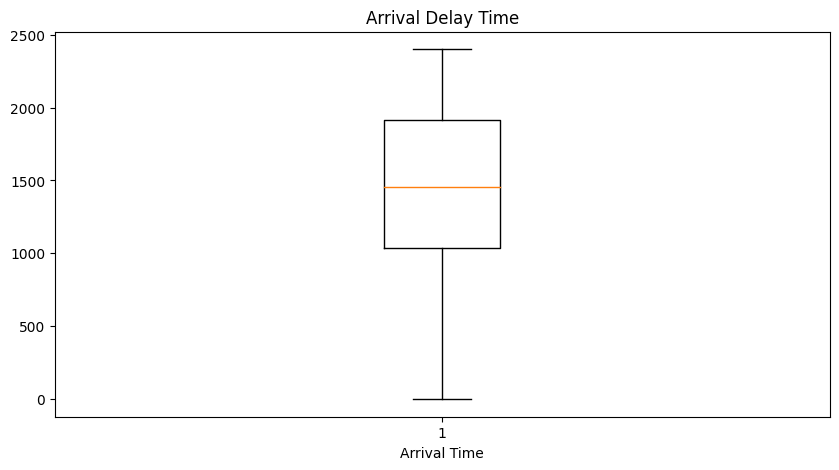

CPU times: user 9.14 s, sys: 735 ms, total: 9.87 s
Wall time: 7.08 s


In [53]:
%%time
plt.figure(figsize=(10,5))
plt.boxplot(x=df.ARR_TIME)
plt.title('Arrival Delay Time')
plt.xlabel('Arrival Time')
# sns.boxplot(x='ARR_TIME',data=df,showfliers=False)
plt.show()

### Lineplot

In [54]:
%%time
df['year'] = df['FL_DATE'].dt.year
df['month'] = df['FL_DATE'].dt.month
df['day'] = df['FL_DATE'].dt.day

CPU times: user 5.52 ms, sys: 1.06 ms, total: 6.58 ms
Wall time: 14.2 ms


In [57]:
%%time
# Plot the historical Sales
plt.figure(figsize=(30,10))
plt.plot(df_filtered.FL_DATE)
plt.xlabel('FL_DATE')
plt.ylabel('DEP_TIME')
plt.title('The flight date and departure time')
plt.show()

NameError: ignored

<Figure size 3000x1000 with 0 Axes>

### Viz Histogram / Plot 1D

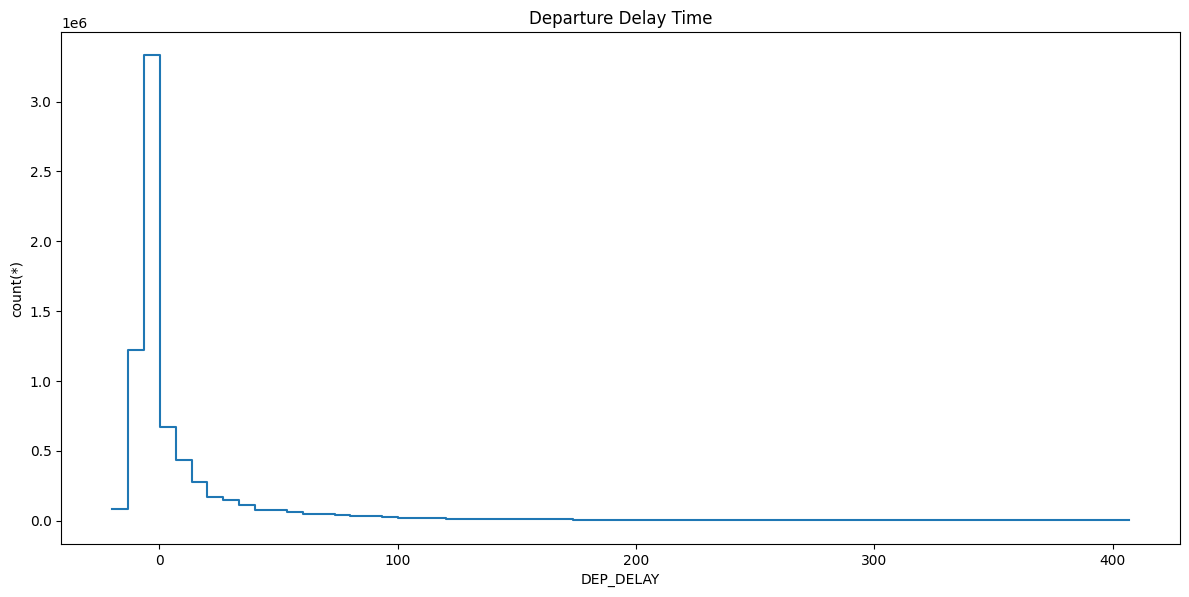

CPU times: user 26.5 s, sys: 1.68 s, total: 28.2 s
Wall time: 20.3 s


In [59]:
%%time
plt.figure(figsize=(12,6))
df.viz.histogram(df.DEP_DELAY, limits='99.7%')
plt.title('Departure Delay Time')
plt.show()

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.15 µs


/usr/local/lib/python3.10/dist-packages/vaex/viz/mpl.py:46: UserWarning: `plot1d` is deprecated and it will be removed in version 5.x. Please use `df.viz.histogram` instead.
  warnings.warn('`plot1d` is deprecated and it will be removed in version 5.x. Please use `df.viz.histogram` instead.')


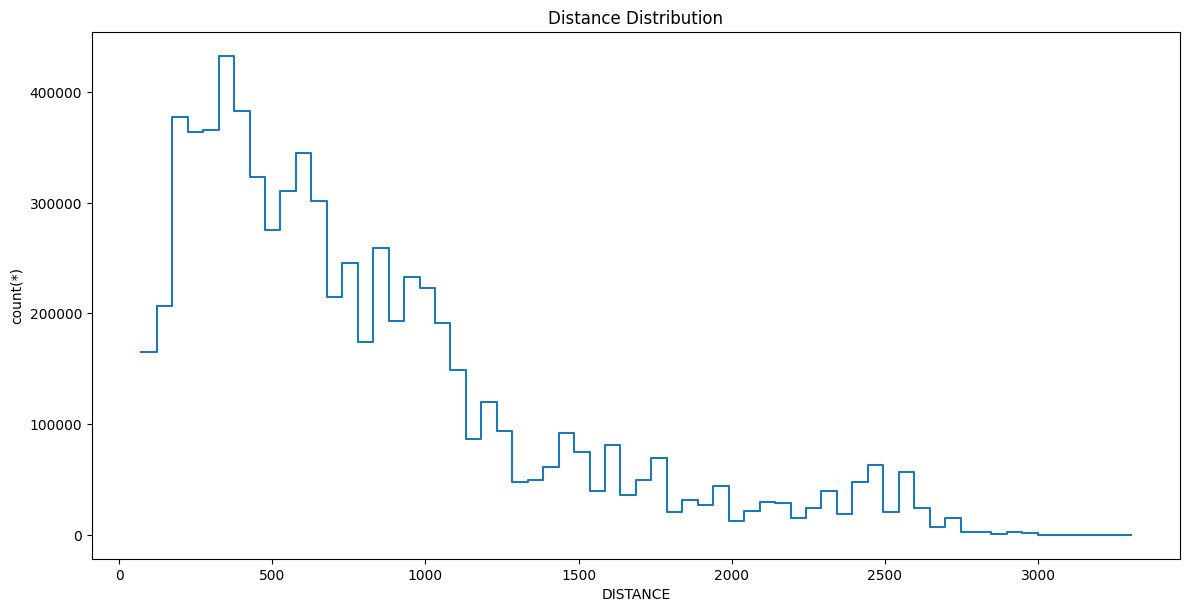

In [60]:
%time
plt.figure(figsize=(12,6))
df.plot1d(df.DISTANCE,limits='99.7%')
plt.title('Distance Distribution')
plt.show()

### Plot 2D/Heatmap with 2 variables

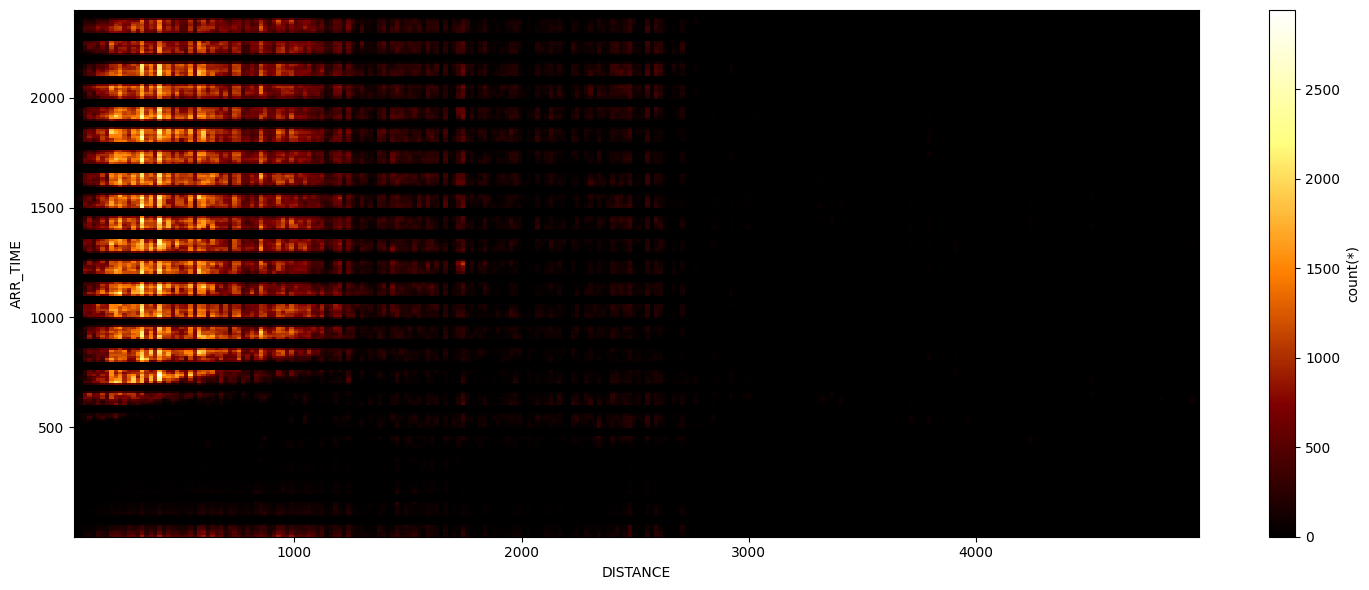

CPU times: user 19.4 s, sys: 1.3 s, total: 20.7 s
Wall time: 14.4 s


In [61]:
%%time

plt.figure(figsize=(15,6))
df.viz.heatmap(df.DISTANCE , df.ARR_TIME)
plt.show()